In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm


This IPython notebook plots the results for the landmine detection experiments

# Fig 2

In [2]:

Ms = [50, 100, 150, 200]

all_values = []
all_messages = []
for M in Ms:
    mine_list = np.arange(0, 6)

    all_mean = []
    all_stderr = []

    file_list = np.arange(5)

    all_ub = []
    all_lb = []
    for l in mine_list:

        all_regrets_1 = []
        all_regrets_2 = []
        all_regrets_3 = []
        all_regrets_4 = []

        for itr in file_list:
            ## load results for RGPE
            log_file_name = "results_rgpe/rgpe_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
            res = pickle.load(open(log_file_name, "rb"))
            values = res["all"]["values"]
            init = res["all"]["init"]["Y"]
            values = list(init) + values
            values_acc = np.maximum.accumulate(values)
            all_regrets_1.append(values_acc[:53])


            ## load results for TS (standard BO)
            policy = "ts"
            log_file_name = "results_standard_bo/" + policy + "_field_" + str(l) + "_iter_" + str(itr) + "_no_agent_info.p"
            res = pickle.load(open(log_file_name, "rb"))
            values = res["all"]["values"]
            init = res["all"]["init"]["Y"]
            values = list(init) + values
            values_acc = np.maximum.accumulate(values)
            all_regrets_2.append(values_acc[:53])


            ## load results for TAF
            log_file_name = "results_taf/taf_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
            res = pickle.load(open(log_file_name, "rb"))
            values = res["all"]["values"]
            init = res["all"]["init"]["Y"]
            values = list(init) + values
            values_acc = np.maximum.accumulate(values)
            all_regrets_3.append(values_acc[:53])


            ## load results for FTS
            policy = "ts"
            log_file_name = "results_fts/" + policy + "_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
            res = pickle.load(open(log_file_name, "rb"))
            values = res["all"]["values"]
            init = res["all"]["init"]["Y"]
            values = list(init) + values
            values_acc = np.maximum.accumulate(values)
            all_regrets_4.append(values_acc[:53])

        all_regrets_1_np = np.array(all_regrets_1)
        all_regrets_2_np = np.array(all_regrets_2)
        all_regrets_3_np = np.array(all_regrets_3)
        all_regrets_4_np = np.array(all_regrets_4)

        all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
        all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
        all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
        all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)

        all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / np.sqrt(len(file_list))
        all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / np.sqrt(len(file_list))
        all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / np.sqrt(len(file_list))
        all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / np.sqrt(len(file_list))

        all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
        all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
        all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
        all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
        all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
        all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
        all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
        all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr

        all_mean.append([all_regrets_1_np_mean, all_regrets_2_np_mean, all_regrets_3_np_mean, all_regrets_4_np_mean])
        all_stderr.append([all_regrets_1_np_stderr, all_regrets_2_np_stderr, all_regrets_3_np_stderr, all_regrets_4_np_stderr])
        all_ub.append([all_regrets_1_np_ub, all_regrets_2_np_ub, all_regrets_3_np_ub, all_regrets_4_np_ub])
        all_lb.append([all_regrets_1_np_lb, all_regrets_2_np_lb, all_regrets_3_np_lb, all_regrets_4_np_lb])


    all_mean_comp = [[all_mean[i][1][-1], all_mean[i][3][-1], all_mean[i][2][-1], all_mean[i][0][-1]] for i in range(len(mine_list))]
    all_mean_comp = np.array(all_mean_comp)

    all_values.append(np.mean(all_mean_comp, axis=0))

    message_len = [M, M + M ** 2 + 1, M + M ** 2]
    
    all_messages.append(message_len)
        

In [3]:

all_values = 1 - np.array(all_values)
all_messages = np.array(all_messages)

all_messages = np.log(all_messages)

x_FTS = all_messages[:, 0]
y_FTS = all_values[:, 1]
x_TAF = all_messages[:, 1]
y_TAF = all_values[:, 2]
x_RGPE = all_messages[:, 2]
y_RGPE = all_values[:, 3]


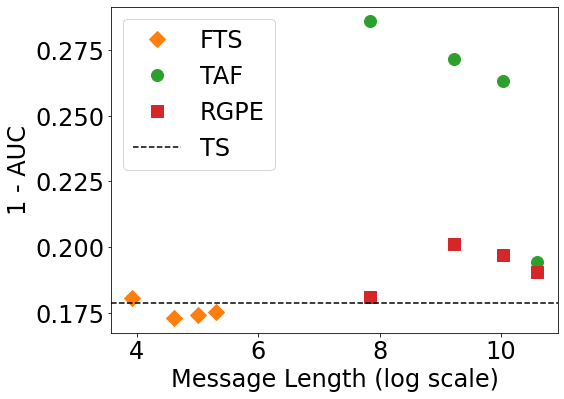

In [4]:

plt.rc('font', size=24)
plt.figure(figsize=(8, 6))

color_list = ["tab:blue", "tab:orange", "tab:red", "tab:green"]
marker_list = ["v", "D", "s", "o"]

plt.plot(x_FTS, y_FTS, color_list[1], linestyle="None", marker=marker_list[1], markersize=12)
plt.plot(x_TAF, y_TAF, color_list[3], linestyle="None", marker=marker_list[3], markersize=12)
plt.plot(x_RGPE, y_RGPE, color_list[2], linestyle="None", marker=marker_list[2], markersize=12)

plt.ylabel("1 - AUC")
plt.xlabel("Message Length (log scale)")
plt.axhline(y=all_values[0, 0], color='k', linestyle='--')

plt.legend(("FTS", "TAF", "RGPE", "TS"), prop={'size':24})
plt.show()


# Fig 3

In [5]:

# M = 50
M = 100
# M = 150
# M = 200

mine_list = np.arange(0, 6)

all_mean = []
all_stderr = []

file_list = np.arange(5)

max_len = 50

all_times_all_subs = []
all_times_all_subs_start = []
all_times_all_subs_values = []
all_times_all_subs_inits = []

all_ub = []
all_lb = []
for l in mine_list:

    all_regrets_1 = []
    all_regrets_2 = []
    all_regrets_3 = []
    all_regrets_4 = []

    all_times_1 = []
    all_times_2 = []
    all_times_3 = []
    all_times_4 = []
    all_times_1_start = []
    all_times_2_start = []
    all_times_3_start = []
    all_times_4_start = []
    all_times_1_values = []
    all_times_2_values = []
    all_times_3_values = []
    all_times_4_values = []
    all_times_1_inits = []
    all_times_2_inits = []
    all_times_3_inits = []
    all_times_4_inits = []
    for itr in file_list:

        ## load results for RGPE
        log_file_name = "results_rgpe/rgpe_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_1.append(values_acc[:53])
        all_times_1.append(res["all"]["timestamps"][:max_len])
        all_times_1_start.append(res["all"]["time_started"])
        all_times_1_values.append(res["all"]["values"][:max_len])
        all_times_1_inits.append(res["all"]["init"]["Y"])


        ## load results for TS (standard BO)
        policy = "ts"
        log_file_name = "results_standard_bo/" + policy + "_field_" + str(l) + "_iter_" + str(itr) + "_no_agent_info.p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_2.append(values_acc[:53])
        all_times_2.append(res["all"]["timestamps"][:max_len])
        all_times_2_start.append(res["all"]["time_started"])
        all_times_2_values.append(res["all"]["values"][:max_len])
        all_times_2_inits.append(res["all"]["init"]["Y"])

        
        ## load results for TAF
        log_file_name = "results_taf/taf_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_3.append(values_acc[:53])
        all_times_3.append(res["all"]["timestamps"][:max_len])
        all_times_3_start.append(res["all"]["time_started"])
        all_times_3_values.append(res["all"]["values"][:max_len])
        all_times_3_inits.append(res["all"]["init"]["Y"])

        
        ## load results for FTS
        policy = "ts"
        log_file_name = "results_fts/" + policy + "_M_" + str(M) + "_subject_" + str(l) + "_iter_" + str(itr) + ".p"
        res = pickle.load(open(log_file_name, "rb"))
        values = res["all"]["values"]
        init = res["all"]["init"]["Y"]
        values = list(init) + values
        values_acc = np.maximum.accumulate(values)
        all_regrets_4.append(values_acc[:53])
        all_times_4.append(res["all"]["timestamps"][:max_len])
        all_times_4_start.append(res["all"]["time_started"])
        all_times_4_values.append(res["all"]["values"][:max_len])
        all_times_4_inits.append(res["all"]["init"]["Y"])

        
    all_times_all_subs.append([all_times_1, all_times_2, all_times_3, all_times_4])    
    all_times_all_subs_start.append([all_times_1_start, all_times_2_start, all_times_3_start, all_times_4_start])    
    all_times_all_subs_values.append([all_times_1_values, all_times_2_values, all_times_3_values, all_times_4_values])    
    all_times_all_subs_inits.append([all_times_1_inits, all_times_2_inits, all_times_3_inits, all_times_4_inits])    
    
    all_regrets_1_np = np.array(all_regrets_1)
    all_regrets_2_np = np.array(all_regrets_2)
    all_regrets_3_np = np.array(all_regrets_3)
    all_regrets_4_np = np.array(all_regrets_4)

    all_regrets_1_np_mean = np.mean(all_regrets_1_np, axis=0)
    all_regrets_2_np_mean = np.mean(all_regrets_2_np, axis=0)
    all_regrets_3_np_mean = np.mean(all_regrets_3_np, axis=0)
    all_regrets_4_np_mean = np.mean(all_regrets_4_np, axis=0)

    all_regrets_1_np_stderr = np.std(all_regrets_1_np, axis=0) / np.sqrt(len(file_list))
    all_regrets_2_np_stderr = np.std(all_regrets_2_np, axis=0) / np.sqrt(len(file_list))
    all_regrets_3_np_stderr = np.std(all_regrets_3_np, axis=0) / np.sqrt(len(file_list))
    all_regrets_4_np_stderr = np.std(all_regrets_4_np, axis=0) / np.sqrt(len(file_list))

    all_regrets_1_np_ub = all_regrets_1_np_mean + all_regrets_1_np_stderr
    all_regrets_1_np_lb = all_regrets_1_np_mean - all_regrets_1_np_stderr
    all_regrets_2_np_ub = all_regrets_2_np_mean + all_regrets_2_np_stderr
    all_regrets_2_np_lb = all_regrets_2_np_mean - all_regrets_2_np_stderr
    all_regrets_3_np_ub = all_regrets_3_np_mean + all_regrets_3_np_stderr
    all_regrets_3_np_lb = all_regrets_3_np_mean - all_regrets_3_np_stderr
    all_regrets_4_np_ub = all_regrets_4_np_mean + all_regrets_4_np_stderr
    all_regrets_4_np_lb = all_regrets_4_np_mean - all_regrets_4_np_stderr

    all_mean.append([all_regrets_1_np_mean, all_regrets_2_np_mean, all_regrets_3_np_mean, all_regrets_4_np_mean])
    all_stderr.append([all_regrets_1_np_stderr, all_regrets_2_np_stderr, all_regrets_3_np_stderr, all_regrets_4_np_stderr])
    all_ub.append([all_regrets_1_np_ub, all_regrets_2_np_ub, all_regrets_3_np_ub, all_regrets_4_np_ub])
    all_lb.append([all_regrets_1_np_lb, all_regrets_2_np_lb, all_regrets_3_np_lb, all_regrets_4_np_lb])


In [6]:

interval_len = 1e-2

subject_list = mine_list
algo_list = np.arange(4)

all_mean_all_subs = []
all_ub_all_subs = []
all_lb_all_subs = []
all_time_all_subs = []
for subject in tqdm(subject_list):
    all_mean_tmp = []
    all_ub_tmp = []
    all_lb_tmp = []
    all_time_tmp = []
    for algo in algo_list:
        all_times = all_times_all_subs[subject][algo]
        all_times_start = all_times_all_subs_start[subject][algo]
        all_times_values = all_times_all_subs_values[subject][algo]
        all_times_inits = all_times_all_subs_inits[subject][algo]

        N_runs = len(all_times_values)

        all_run_times = []
        all_run_values = []
        all_run_inits = []
        for i in range(N_runs):
            timestamps = all_times[i]
            time_start = all_times_start[i]
            values = all_times_values[i]
            times = np.log(np.array(timestamps) - np.array(time_start))

            all_run_times.append(times)
            all_run_values.append(values)
            all_run_inits.append(np.max(all_times_inits[i]))

        time_max = np.max(all_run_times)
        time_min_tmp = [np.min(all_run_times[i]) for i in range(N_runs)]
        time_min_max = np.max(time_min_tmp)
        time_min_min = np.min(time_min_tmp)

        time_inds = np.arange(0, time_max, interval_len)

        values_time = []
        values_mean, values_ub, values_lb = [], [], []
        for ind in time_inds:
            if ind >= time_min_max:
                all_inds_closest = [np.max(np.nonzero(all_run_times[i] <= ind)[0]) for i in range(N_runs)]
                
                all_runs_tmp = [np.max([all_run_inits[i]] + all_run_values[i][:all_inds_closest[i]+1]) for i in range(N_runs)]
    
                all_runs_tmp = 1.0 - np.array(all_runs_tmp)
                
                mean_tmp = np.mean(all_runs_tmp)
                std_tmp = np.std(all_runs_tmp) / np.sqrt(len(all_runs_tmp))
                values_mean.append(mean_tmp)
                values_ub.append(mean_tmp + std_tmp)
                values_lb.append(mean_tmp - std_tmp)

            else:
                all_run_inits_tmp = 1 - np.array(all_run_inits)
                mean_tmp = np.mean(all_run_inits_tmp)
                std_tmp = np.std(all_run_inits_tmp) / np.sqrt(len(all_run_inits_tmp))
                values_mean.append(mean_tmp)
                values_ub.append(mean_tmp + std_tmp)
                values_lb.append(mean_tmp - std_tmp)

        all_mean_tmp.append(np.array(values_mean))
        all_ub_tmp.append(np.array(values_ub))
        all_lb_tmp.append(np.array(values_lb))
        all_time_tmp.append(np.array(time_inds))
            
    all_mean_all_subs.append(all_mean_tmp)
    all_ub_all_subs.append(all_ub_tmp)
    all_lb_all_subs.append(all_lb_tmp)
    all_time_all_subs.append(all_time_tmp)


100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


In [8]:

def plot_mean_and_CI(time_steps, mean, lb, ub, color_mean=None, color_shading=None):
    plt.fill_between(time_steps, ub, lb, color=color_shading, alpha=.2)
    plt.plot(time_steps, mean, color_mean, linewidth=2.8)


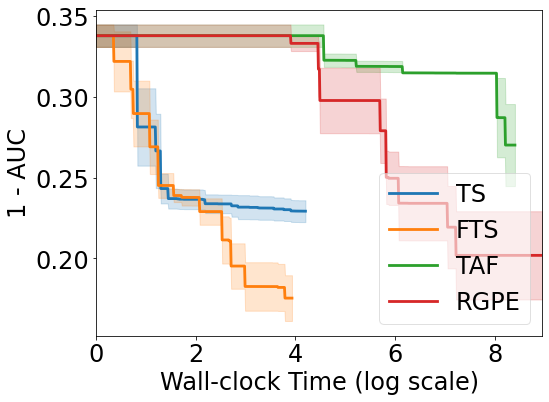

In [9]:

lw = 2.0
plt.rc('font', size=24)
plt.figure(figsize=(8, 6))

color_list = ["tab:blue", "tab:orange", "tab:red", "tab:green"]
marker_list = ["v", "D", "s", "o"]

inds = np.arange(1, 100)

# choose the field to display: 0-5
i = 0

plot_mean_and_CI(all_time_all_subs[i][1], all_mean_all_subs[i][1], all_ub_all_subs[i][1], all_lb_all_subs[i][1], \
                 color_mean=color_list[0], color_shading=color_list[0])
plot_mean_and_CI(all_time_all_subs[i][3], all_mean_all_subs[i][3], all_ub_all_subs[i][3], all_lb_all_subs[i][3], \
                 color_mean=color_list[1], color_shading=color_list[1])    
plot_mean_and_CI(all_time_all_subs[i][2], all_mean_all_subs[i][2], all_ub_all_subs[i][2], all_lb_all_subs[i][2], \
                 color_mean=color_list[3], color_shading=color_list[3])
plot_mean_and_CI(all_time_all_subs[i][0], all_mean_all_subs[i][0], all_ub_all_subs[i][0], all_lb_all_subs[i][0], \
                 color_mean=color_list[2], color_shading=color_list[2])    

max_ind_display = np.max([np.max(all_time_all_subs[i][j]) for j in range(4)])

plt.legend(("TS", "FTS", "TAF", "RGPE"), prop={'size':24}, loc='lower right', framealpha=0.6)

plt.ylabel("1 - AUC")
plt.xlabel("Wall-clock Time (log scale)")

axes = plt.gca()
axes.set_xlim([0, max_ind_display])

plt.show()
